<a href="https://colab.research.google.com/github/evanstjabadi/stock/blob/main/xauusd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trying my real best to do Xau/USD predictions

### Evans Tjabadi 


In [ ]:
!pip install yfinance

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("fivethirtyeight")


In [ ]:
# Get the data from Yahoo Finance
df = yf.download('GC=F', '2019-05-31', '2021-06-29', auto_adjust=True, interval="1wk")


[*********************100%***********************]  1 of 1 completed


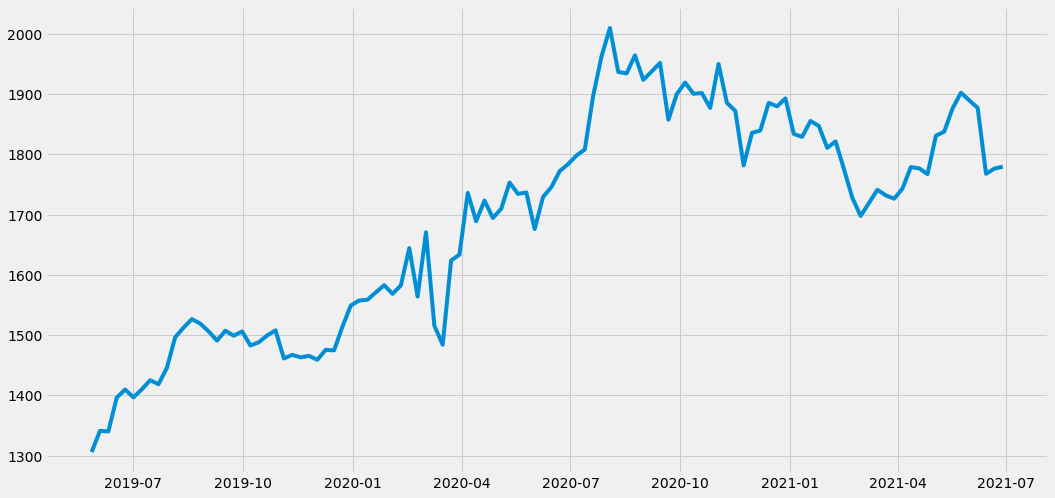

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])


In [ ]:
# Only the close column

data = df.filter(['Close'])
dataset = data.values



In [ ]:
# training dataset
length = math.ceil(len(dataset)*0.90)

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)



In [ ]:
# Create training dataset
train_data = scaled_data[0:length , :]

#x and y dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=60:
    print(x_train)


[array([0.        , 0.05026254, 0.04870074, 0.12835427, 0.14752224,
       0.12906419, 0.14780631, 0.16938796, 0.16001699, 0.19849488,
       0.27090721, 0.29348285, 0.3135027 , 0.30285382, 0.28453773,
       0.26281413, 0.2860997 , 0.27445683, 0.28453773, 0.25117126,
       0.25898044, 0.27502481, 0.28709353, 0.22078662, 0.22930572,
       0.22334224, 0.22689187, 0.21766285, 0.24109037, 0.23981247,
       0.29532873, 0.34559126, 0.35737609, 0.35922196, 0.37668601,
       0.3934403 , 0.37313638, 0.39315623, 0.48104496, 0.36674706,
       0.51824512, 0.2980263 , 0.25301714, 0.45165414, 0.46556856,
       0.61110315, 0.54437021, 0.59307113, 0.55189549, 0.57376121,
       0.63552467, 0.60883142, 0.61209715, 0.52591217, 0.60130632,
       0.62487579, 0.66264376, 0.67897203, 0.69913383, 0.71347445])]


In [ ]:
# convert to numpy
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.        , 0.05026254, 0.04870074, ..., 0.67897203, 0.69913383,
        0.71347445],
       [0.05026254, 0.04870074, 0.12835427, ..., 0.69913383, 0.71347445,
        0.83984106],
       [0.04870074, 0.12835427, 0.14752224, ..., 0.71347445, 0.83984106,
        0.93284122],
       ...,
       [0.37313638, 0.39315623, 0.48104496, ..., 0.58739173, 0.61848647,
        0.60542375],
       [0.39315623, 0.48104496, 0.36674706, ..., 0.61848647, 0.60542375,
        0.59733068],
       [0.48104496, 0.36674706, 0.51824512, ..., 0.60542375, 0.59733068,
        0.62118422]])

In [ ]:
# reshape
# Always run x_train.shape to get the values below
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
# Built the model!

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

print("done")


done


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train
model.fit(x_train, y_train, batch_size=1,epochs=1)


39/39 [==============================] - 5s 27ms/step - loss: 0.2742


In [ ]:
# creating testing dataset
# scaled values
test_data = scaled_data[length-60:,:]

x_test = []
y_test = dataset[length:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
# np array
x_test = np.array(x_test)

# Reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# Prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# Evaluate
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

18.66650390625

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


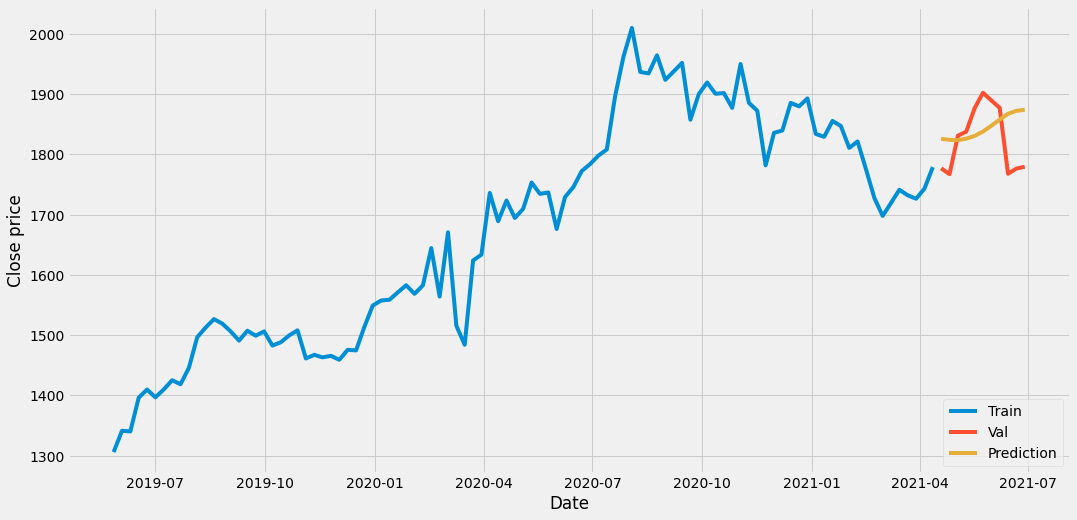

In [ ]:
train = data[:length]
validation = data[length:]
validation['Predictions'] = predictions

# Visuals
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
validation

,Close,Predictions
Date,,
2021-04-19,1777.000000,1825.936035
2021-04-26,1767.300049,1824.350708
2021-05-03,1831.099976,1823.819336
2021-05-10,1837.900024,1826.251709
2021-05-17,1876.699951,1830.865723
2021-05-24,1902.500000,1838.090088
2021-05-31,1889.800049,1847.643677
2021-06-07,1877.400024,1857.866333
2021-06-14,1767.900024,1867.554565


In [ ]:
# New
new_df = yf.download('GC=F', '2019-05-31', '2021-06-29', auto_adjust=True, interval="1wk")

new_df = new_df.filter(['Close'])

last_60 = new_df[-60:].values

scaled_last_60 = scaler.transform(last_60)

X_test = []

# Appended last 60
X_test.append(scaled_last_60)
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
pred_price



[*********************100%***********************]  1 of 1 completed


array([[1873.6597]], dtype=float32)

In [ ]:
new_df = yf.download('GC=F', '2021-07-02', '2021-07-06', auto_adjust=True, interval="1wk")
new_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-06-28,1775.699951,1787.900024,1768.800049,1782.599976,88
2021-07-05,1787.500000,1796.400024,1784.699951,1792.000000,59990
